In [1]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature_detection
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')

In [3]:
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

In [4]:
cm = feature_detection.harris_corner(cylinder_img_list[0])

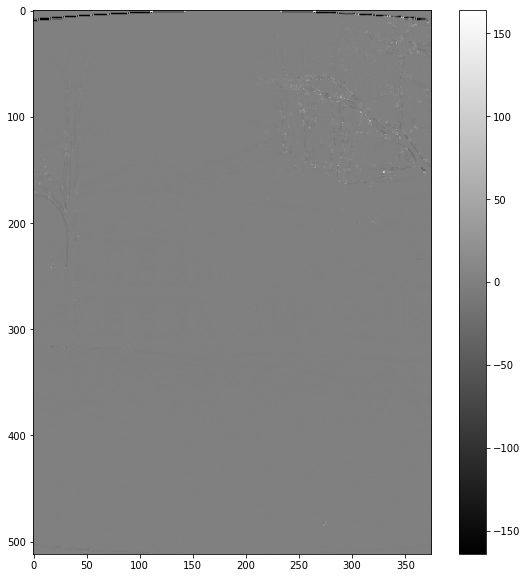

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='gray')
plt.colorbar()
plt.show()

In [93]:
def extract_description(img, corner_response, threshold=0.01, kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #gray = cv2.GaussianBlur(gray, (kernel, kernel), kernel)
    
    # Reduce corner
    features = np.zeros(shape=gray.shape, dtype=np.uint8)
    features[corner_response > threshold*corner_response.max()] = 255
    features[:10,:] = 0  # Avoid feature on image edge
    features[-10:,:] = 0
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(features, cmap='gray')
    #plt.colorbar()
    #plt.show()
    
    feature_positions = []
    feature_descriptions = np.zeros(shape=(1, kernel**2), dtype=np.float32)
    
    half_k = kernel//2
    height, width, _ = img.shape
    for y in range(half_k, height-half_k):
        for x in range(half_k, width-half_k):
            if features[y][x] == 255:
                feature_positions += [[y, x]]
                desc = corner_response[y-half_k:y+half_k+1, x-half_k:x+half_k+1]
                feature_descriptions = np.append(feature_descriptions, [desc.flatten()], axis=0)
                
    return feature_descriptions[1:], feature_positions
                

In [94]:
descs, pos = extract_description(cylinder_img_list[0], cm, kernel=5)

In [95]:
cm2 = feature_detection.harris_corner(cylinder_img_list[1])
descs2, pos2 = extract_description(cylinder_img_list[1], cm2, kernel=5)

In [130]:
def feature_matching(descriptor1, descriptor2, feature_position1, feature_position2):
    matched_pairs = []
    
    for i in range(len(descriptor1)):
        distances = []
        y = feature_position1[i][0]
        for j in range(len(descriptor2)):
            diff = float('Inf')
            if y-10 <= feature_position2[j][0] <= y+10:
                diff = descriptor1[i] - descriptor2[j]
                diff = (diff**2).sum()
            distances += [diff]
        
        sorted_d = np.sort(distances)
        
        if sorted_d[0]/sorted_d[1] <= 0.4:
            paired_index = np.where(distances==sorted_d[0])[0][0]
            #print(featue_position1[i], paired_index)
            pair = [feature_position1[i], feature_position2[paired_index]]
            matched_pairs += [pair]
            print(pair)
    
    return matched_pairs

In [131]:
matched = feature_matching(descs, descs2, pos, pos2)

[[34, 297], [32, 4]]
[[36, 297], [34, 4]]
[[90, 326], [90, 161]]
[[125, 30], [129, 275]]
[[126, 31], [130, 276]]
[[127, 30], [131, 275]]
[[127, 31], [131, 276]]
[[128, 30], [132, 275]]
[[128, 31], [132, 276]]
[[128, 32], [132, 277]]
[[129, 31], [133, 276]]
[[131, 31], [135, 276]]
[[131, 32], [135, 277]]
[[131, 36], [135, 281]]
[[131, 37], [135, 282]]
[[132, 38], [136, 283]]
[[135, 372], [136, 92]]
[[151, 234], [159, 134]]
[[188, 38], [194, 13]]
[[194, 321], [200, 25]]
[[212, 41], [216, 287]]
[[212, 42], [216, 288]]
[[213, 41], [217, 287]]
[[213, 42], [217, 288]]
[[214, 41], [218, 287]]
[[214, 42], [218, 288]]
[[218, 38], [222, 284]]
[[218, 39], [222, 285]]
[[239, 20], [243, 267]]
[[258, 28], [263, 283]]
[[281, 41], [286, 287]]
[[282, 41], [287, 287]]
[[283, 41], [288, 287]]
[[284, 41], [289, 287]]
[[318, 41], [322, 287]]
[[318, 42], [322, 288]]
[[419, 316], [411, 340]]


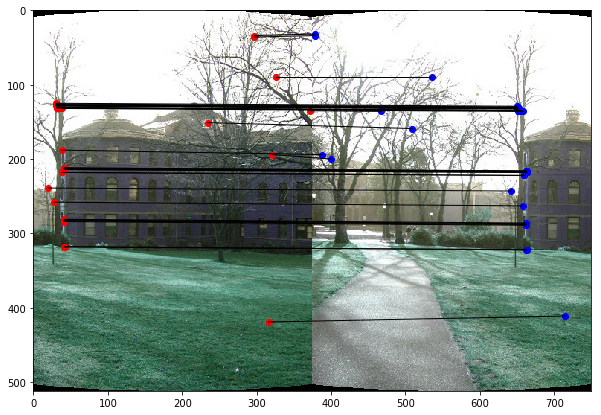

In [132]:
_, offset, _ = cylinder_img_list[0].shape
plt_img = np.concatenate((cylinder_img_list[0], cylinder_img_list[1]), axis=1)
plt.figure(figsize=(10,10))
plt.imshow(plt_img)
for i in range(len(matched)//1):
    plt.scatter(x=matched[i][0][1], y=matched[i][0][0], c='r')
    plt.plot([matched[i][0][1], offset+matched[i][1][1]], [matched[i][0][0], matched[i][1][0]], 'k-', lw=1)
    plt.scatter(x=offset+matched[i][1][1], y=matched[i][1][0], c='b')
plt.show()


In [92]:
a=np.arange(4)
print(a)
np.amin(a)
idx = np.argpartition(a, -2)
idx

[0 1 2 3]


array([0, 1, 2, 3], dtype=int64)